# Results of the BOINC Census 2023

*Written by Marcus Belcastro for The Science Commons Initiative - Jan 2024*

---

## Introduction

**TLDR is at the bottom under 'Summary' For those who want a quick read**

The Berkeley Open Infrastructure for Network Computing (BOINC) is a community that has been established for more than two decades now, and in that time we have seen the highs and lows of what hundreds of thousands of everyday computers from around the globe can collectively accomplish. For those who don't know, the BOINC network is a volunteer computing platform where everyday people can use their computers to accomplish real-world scientific work and has been responsible for several advances in mathematics, biology, astronomy, the study of cancer and even the development of treatments for COVID-19.

The BOINC Census is an ongoing initiative that captures the perception and ideas that people have about BOINC in order to help the community and BOINC projects grow and you are currently reading the 2nd ever BOINC census! (You can find the last one [here](https://thesciencecommons.org/BOINC/Census/2022/))

This Census is led by [The Science Commons Initiative](https://thesciencecommons.org/) (The SCI) which is a not-for-profit based in the US that aims to reconnect everyday people with science, and one way they are doing this is improving the BOINC ecosystem.

The raw data for this poll is available [here]() and was collected using [Fillout](https://www.fillout.com/).

If you would like to be notified when the next Census will be released and its results, click [here](https://48f500b4.sibforms.com/serve/MUIEAPxeBUaEy0MPwbUehC3dmzlUjzNgro4mfwPajqmaUzZ_N5n3uqzifniQf16GDISreI7P79ffdMUT9EKA5B1omZXEauKwXIIWm6LYg0k3371eTVBFMHOCuzDvtYS7yYhrxd2TlAMXlzlSgaKNbLVlEq7NdLbHgemuaxj1xui6BteNFbfMOrBqHfv7r6PTXLxf_vnSSlLNExQw) or go to [The Science Commons Initiative website](https://thesciencecommons.org/) and sign up to their newsletter.

---

# Basic Statistics

This year, we had **1119 Responses**, 939 of which finished the form. From here-on we will be using the results from the completed forms unless stated otherwise.

It's also good to see that The vast majority of respondents have used BOINC before!

In [1]:
import re
import csv
from collections import Counter

import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn

raw_data_str = requests.get('https://raw.githubusercontent.com/TheSCInitiative/BOINC/main/BOINC_Census/2022/data_source/BOINC_Census_2022_results_raw_cleaned.csv').text
data_str = requests.get('https://raw.githubusercontent.com/TheSCInitiative/BOINC/main/BOINC_Census/2022/data_source/BOINC_Census_2022_results_completed.csv').text
raw_data = [row for row in csv.reader(raw_data_str.split('\n')) if bool(row)]
data = [row for row in csv.reader(data_str.split('\n')) if bool(row)]
headers = data[0]

# Remove headers from data
raw_data = raw_data[1:]
data = data[1:]

# Eye candy settings
BINARY_COLOURS = ['#38CF62', '#E65050']
GENERAL_COLOURS = seaborn.color_palette("colorblind")
BOINC_BLUE = '#163E72'

def get_col(heading: str, data_source: list):
    idx = headers.index(heading)
    return [row[idx] for row in data_source]

def multi_sel_to_hist(mult_sel_col: list[str]):
    '''
    Converts a column with CSV values in each cell to a simple list that can
    be turned into a histogram.
    
    Fillout does not perform escaping on internal commas so we have to handle it.
    Because I always put a space after a comma, we can safely replace it.
    '''
    return sum([row.replace(', ', ' ').split(',') for row in mult_sel_col], start=[])
        

Total Submissions: 1119
Completed Submissions: 939


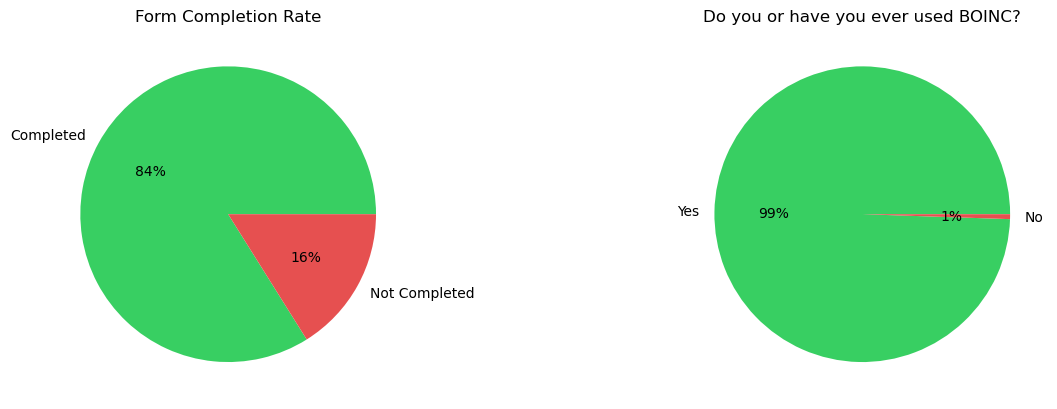

In [2]:
print(f'Total Submissions: {len(raw_data)}')
print(f'Completed Submissions: {len(data)}')

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

used_boinc_counter = Counter(get_col('Do you or have you ever used BOINC?', data))

ax[0].pie([len(data), len(raw_data) - len(data)], labels=['Completed', 'Not Completed'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[1].pie([used_boinc_counter['Yes'], used_boinc_counter['No']], labels=['Yes', 'No'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[0].title.set_text('Form Completion Rate')
ax[1].title.set_text('Do you or have you ever used BOINC?')
plt.show()

# Demographics

Let's take a look at what the sample of BOINC users looks like broken down into high-level demographics! 

There were a few people who, at the end of the survey, asked why we need to know these things. My response to their concern is that if we know what type of people use BOINC on a daily basis, then we can understand a number of things. We can help developers and project admins know their audience and better tend to their demands, and we can also identify parts of the community where bias might exist. For example, does BOINC appear too technologically intimidating? This might be reflected by the huge portion of highly educated members and maybe low representation of younger audiences.

As people mostly expected provided the poll conducted in 2006, the vast majority of BOINC users identify as male.

Interesting to note that the age groups of BOINC users are decently mixed with 31-50 consisting of the top-two age groups. 

I was surprised to know that tertiary graduates make up almost two-thirds of the respondents.

People from the North-America made up the majority of the respondents, Europeans coming second.

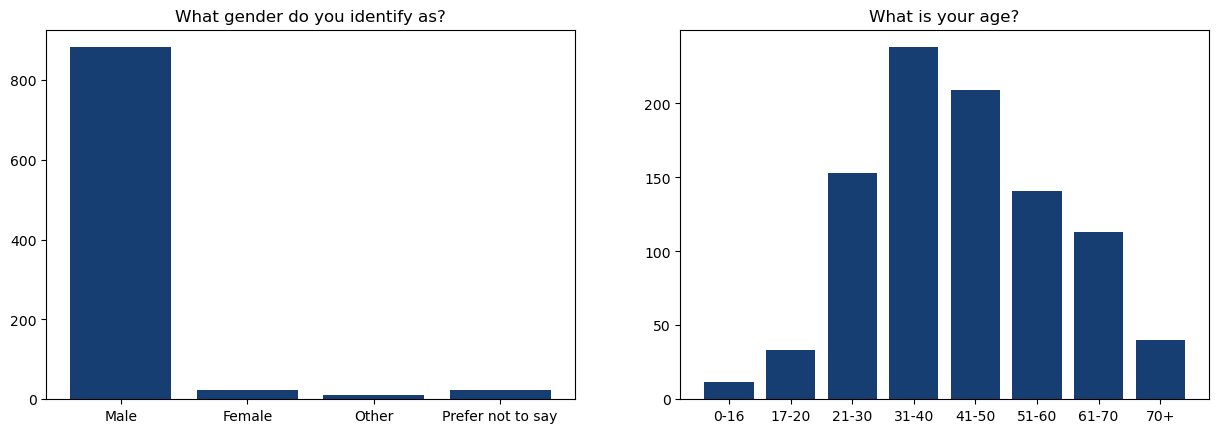

In [3]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
gender_groups = Counter(get_col('What gender do you identify as?', data)).items()
age_groups = Counter(get_col('What is your age?', data))
age_groups_sorted = sorted(age_groups.items(), key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+'))) # Ensure that 'more than' values are put to the end

ax[0].bar([a[0] for a in gender_groups], [a[1] for a in gender_groups], color=BOINC_BLUE)
ax[1].bar([a[0] for a in age_groups_sorted], [a[1] for a in age_groups_sorted], color=BOINC_BLUE)
ax[0].title.set_text('What gender do you identify as?')
ax[1].title.set_text('What is your age?')

plt.show()

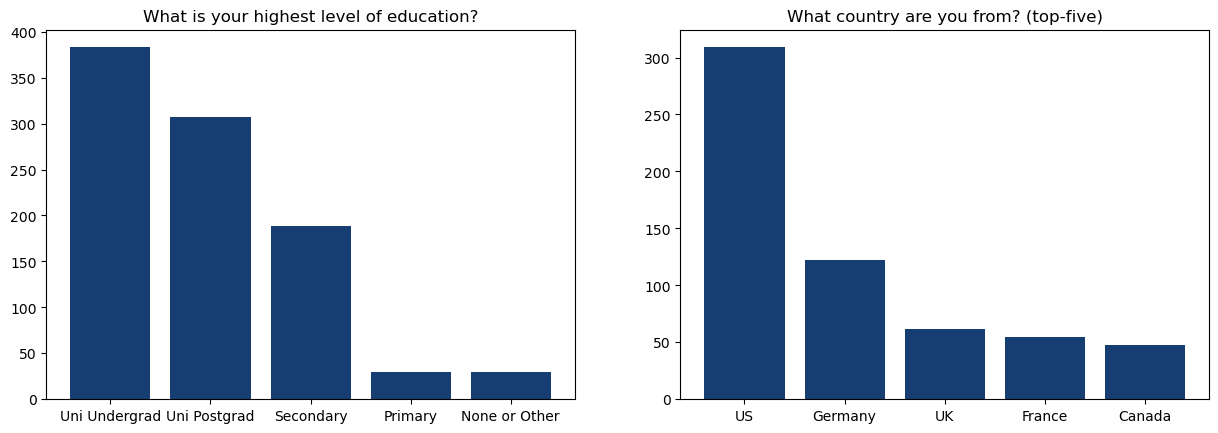

In [4]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
edu_groups = Counter(get_col('What is your highest level of education you have completed?', data))
country_groups = Counter(get_col('What country are you from?', data))
# Take the top 5 sources to prevent clutter
country_groups = sorted(country_groups.items(), key=lambda x: x[1], reverse=True)[:5]
# Combine none and other
edu_groups['None or Other'] = edu_groups['No Education'] + edu_groups['Other']
edu_groups.pop('No Education')
edu_groups.pop('Other')

repl_dict = {
    'United States of America' : 'US',
    'United Kingdom' : 'UK',
    'Tertiary Education (postgraduate)' : 'Uni Postgrad', 
    'Tertiary Education (undergraduate)' : 'Uni Undergrad', 
    'Secondary Education' : 'Secondary', 
    'Primary Education' : 'Primary'
}

edu_groups = edu_groups.items()

ax[0].bar([repl_dict.get(a[0], a[0]) for a in edu_groups], [a[1] for a in edu_groups], color=BOINC_BLUE)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in country_groups], [a[1] for a in country_groups], color=BOINC_BLUE)
ax[0].title.set_text('What is your highest level of education?')
ax[1].title.set_text('What country are you from? (top-five)')

plt.show()

# BOINC usage

Let's get to know how people use BOINC!

Firstly we have computing devices. We find that generally people have 1-5 computers running BOINC and that the use of mobile devices is heavily skewed to no use at all.

Investigating further we show that only 23% of respondents have a mobile device regularly running BOINC.

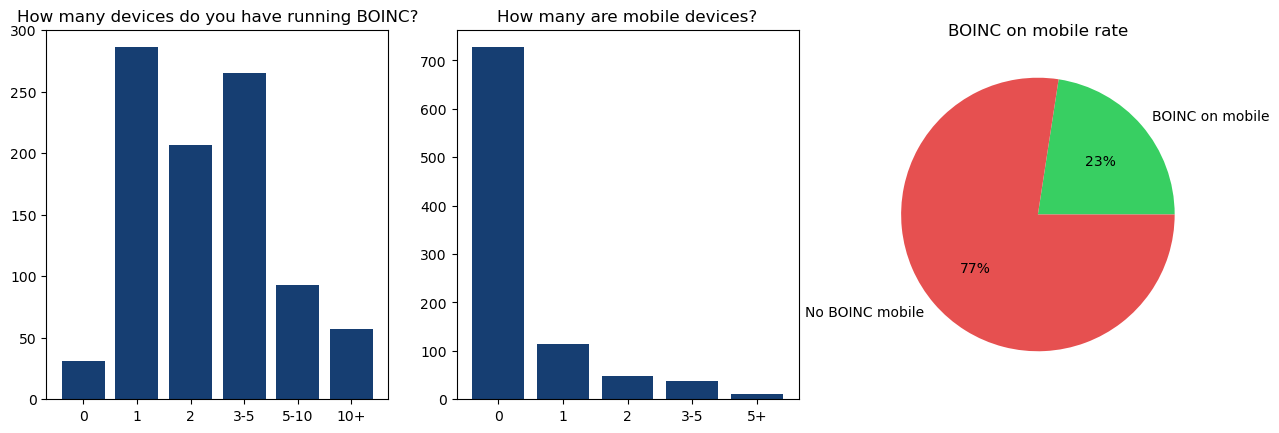

In [5]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(15)
computers = Counter(get_col('How many computers do you have that run BOINC regularly?', data))
computers_sorted = sorted(computers.items(), key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+'))) # Ensure that 'more than' values are put to the end
mobiles = Counter(get_col('How many of the above computers are mobile devices? (mobile phones or tablets)', data))
mobiles_sorted = sorted(mobiles.items(), key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+'))) # Ensure that 'more than' values are put to the end

ax[0].bar([c[0] for c in computers_sorted], [c[1] for c in computers_sorted], color=BOINC_BLUE)
ax[1].bar([c[0] for c in mobiles_sorted], [c[1] for c in mobiles_sorted], color=BOINC_BLUE)
ax[2].pie([len(data) - mobiles['0'], mobiles['0']], labels=['BOINC on mobile', 'No BOINC mobile'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[0].title.set_text('How many devices do you have running BOINC?')
ax[1].title.set_text('How many are mobile devices?')
ax[2].title.set_text('BOINC on mobile rate')

plt.show()

Another question that was asked is how often people run BOINC.

We see a huge percentage of respondents say that they run it most of the time, 24/7 even whereas about 25% run it sparingly or when their computers are idle.

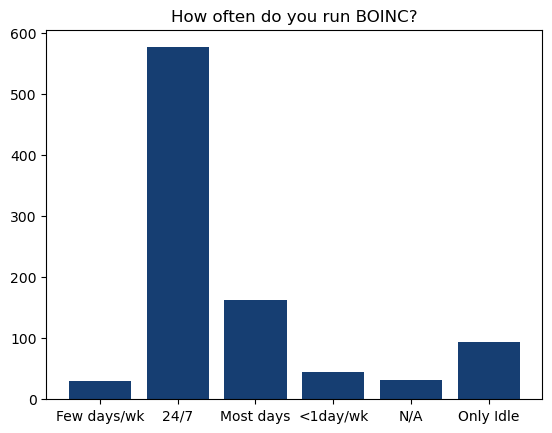

In [6]:
boinc_often = Counter(get_col('How often do you run BOINC?', data)).items()

repl_dict = {
    'A few days of the week' : 'Few days/wk',
    'All the time (24/7)' : '24/7',
    'Most days of the week' : 'Most days', 
    'A few hours every week' : '<1day/wk', 
    "I don't use BOINC" : 'N/A', 
    "Only when I'm not using the computer" : 'Only Idle'
}

plt.bar([repl_dict.get(a[0], a[0]) for a in boinc_often], [a[1] for a in boinc_often], color=BOINC_BLUE)
plt.title('How often do you run BOINC?')
plt.show()

# BOINC Impact

The one thing that a lot of us want to see with BOINC is that our contribution has a positive impact on the world. So there were a few questions in this census which gathered some basic metrics on it.

Firstly let's talk about enthusiasm in the community. We asked how much impact people think they are having and it seems a little pessimistic according to me. The majority of responses were people thinking they only make a small impact on the world by running BOINC.

Secondly let's talk about contributions to greenhouse gas emissions. We know that BOINC crunching is computationally expensive and computers take up a decent amount of electricity to crunch BOINC tasks, so the community might be concerned over the dominance of particular energy sources of crunchers. We find that most crunchers are unsure or use fossil fuels, but there is a decent amount of crunchers who use renewable sources of electricity. Examining the responses to the 'Other' section, we find a decent amount of people using nuclear power as a source of electricity which is, apart from the process of acquiring the uranium, a relatively clean source of electricity.

By the looks of this, it appears that we have a lot of work to do both on the community side and the emissions side of BOINC.

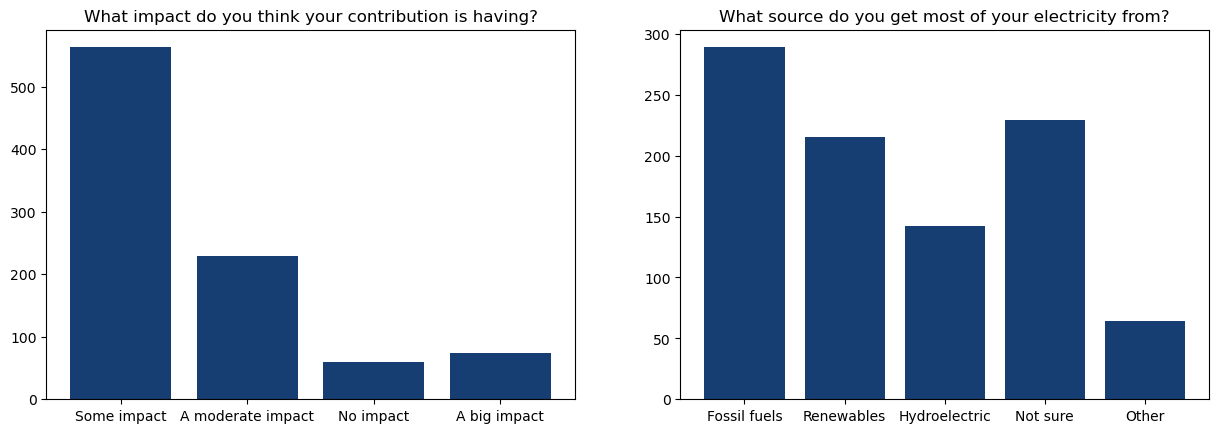

In [7]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
contrib_impact = Counter(get_col('How much impact do you think your BOINC contribution is having?', data))
contrib_impact.pop('') # Empty responses were recorded due to an error in the form. This occurred 13 times.
contrib_impact = contrib_impact.items()
energy_src = Counter(get_col('What source do you get most of your electricity from?', data)).items()

ax[0].bar([a[0] for a in contrib_impact], [a[1] for a in contrib_impact], color=BOINC_BLUE)
ax[1].bar([re.sub(r' \(.*\)', '', a[0]) for a in energy_src], [a[1] for a in energy_src], color=BOINC_BLUE)
ax[0].title.set_text('What impact do you think your contribution is having?')
ax[1].title.set_text('What source do you get most of your electricity from?')

plt.show()

Another angle of impact is how much financial and non-financial impact people are having on the projects themselves. Outside of crunching, volunteers can contribute to BOINC projects in a variety of ways, these of which can be financial (directly donating to a project) or non-financial (donating PC/server hardware to the project or doing some coding to help the project fix a bug or implement a new feature).

I wanted to see if there is a decent difference between people contributing financially vs non-financially because my assumption was that a lot more people would contribute non-financially compared to financially. I was shocked to see that they were about the same!

Next census, I will likely combine this into one large question so that we can easily see total proportions.

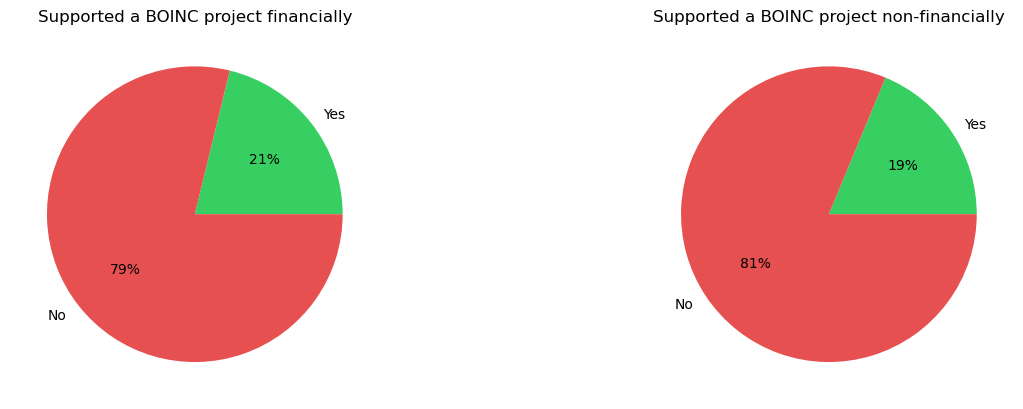

In [8]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

financially = list(Counter(get_col('Have you ever supported a BOINC project financially?', data)).items())
financially.sort(reverse=True)
non_financially = list(Counter(get_col('Aside from running BOINC, have you ever supported a BOINC project non-financially? (eg, donating computer hardware, volunteering time)', data)).items())
non_financially.sort(reverse=True)

ax[0].pie([a[1] for a in financially], labels=[a[0] for a in financially], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[1].pie([a[1] for a in non_financially], labels=[a[0] for a in non_financially], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[0].title.set_text('Supported a BOINC project financially')
ax[1].title.set_text('Supported a BOINC project non-financially')

plt.show()

# BOINC Origins

In this section, we will see when and where people came to know about BOINC.

In terms of when people learned about BOINC, it seems to be pretty flat apart from the value at 2002. This is likely because we had a lot of respondents who are BOINC veterans and have been around since the beginning. Based on this data, I can definitely foresee in the next census that I'll be changing this part of the form to a numerical input instead of a combo-box.

Then I picked the top 5 places where people first heard about BOINC. It looks like we might also be changing the form here too as a lot of respondents were unsure or chose other responses. Beyond that, the top responses included web searches, in a news article (online or physical) or from a friend.

Investigating the 'other' responses, we find that the majority of responses are linked to SETI@home when they moved from their own app to the BOINC system. This is followed by a decent number of people discovering it from an online forum and a few responses that say they read about it in a journal article. You will also find that there is one person that said they found BOINC was mentioned in a school textbook!

There was also one response which said that they "googled what to do with old PCs" and BOINC showed up. I think that this is something that BOINC can capitalize on in terms of discoverability and SEO.

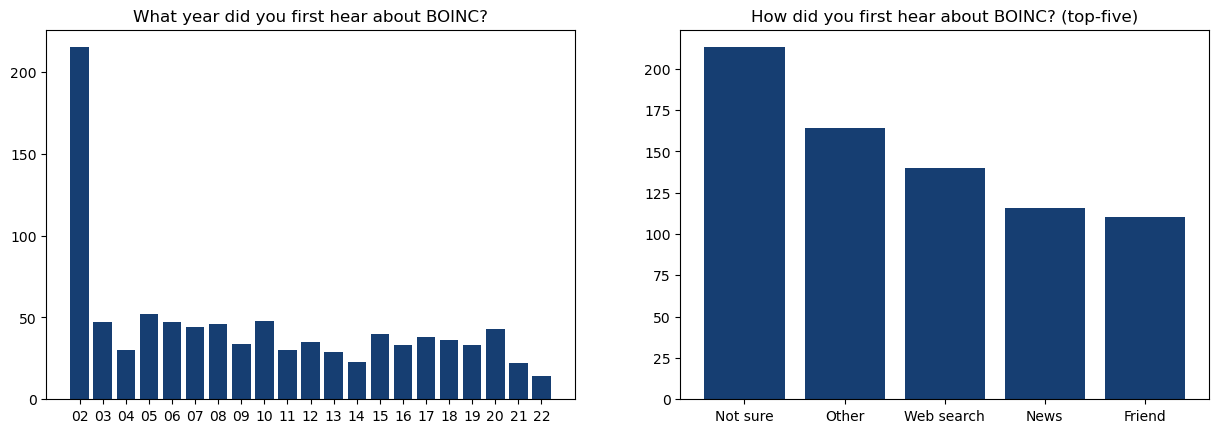

In [9]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
when_boinc = sorted(Counter(get_col('What year did you first hear about BOINC?', data)).items())
where_boinc = Counter(get_col('How did you first hear about BOINC?', data))
# Take the top 5 sources to prevent clutter
where_boinc_top = sorted(where_boinc.items(), key=lambda x: x[1], reverse=True)[:5]
repl_dict = {
    'Via a Google search or other search engine' : 'Web search',
    'From a news article (both print or digital)' : 'News',
    'Word-of-mouth/a friend told me' : 'Friend'
}

ax[0].bar([a[0][2:] for a in when_boinc], [a[1] for a in when_boinc], color=BOINC_BLUE)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in where_boinc_top], [a[1] for a in where_boinc_top], color=BOINC_BLUE)
ax[0].title.set_text('What year did you first hear about BOINC?')
ax[1].title.set_text('How did you first hear about BOINC? (top-five)')

plt.show()

# Project Administration

Here are some interesting statistics for project administrators to look at.

*Keep in mind that the following two graphs include data that came from multi-select boxes (people can select more than one option)*

Represented by the first graph is where people typically look if they have issues or need help. The top 5 results here look pretty obvious, people would prefer to look at project forums, chat groups or do a web search to solve their problem. Interesting to see that the official BOINC site is quite popular in this case.

When a discovery is made, or if something has happened to the project, people want to know about it. So how do people want to be notified?

Notifications via the BOINC manager takes the cake as the top response. Not many projects do this often and people are saying they want to see more of it! Email also appears to be a very valid option too. I know when WCG was still apart of IBM, I signed up to their monthly newsletter and enjoyed reading what the project was doing every now and then. Yet no other BOINC project has done this in my personal experience. There were also a lot of responses for general feedback about the BOINC Census **asking for this survey to be advertised on the BOINC manager**.

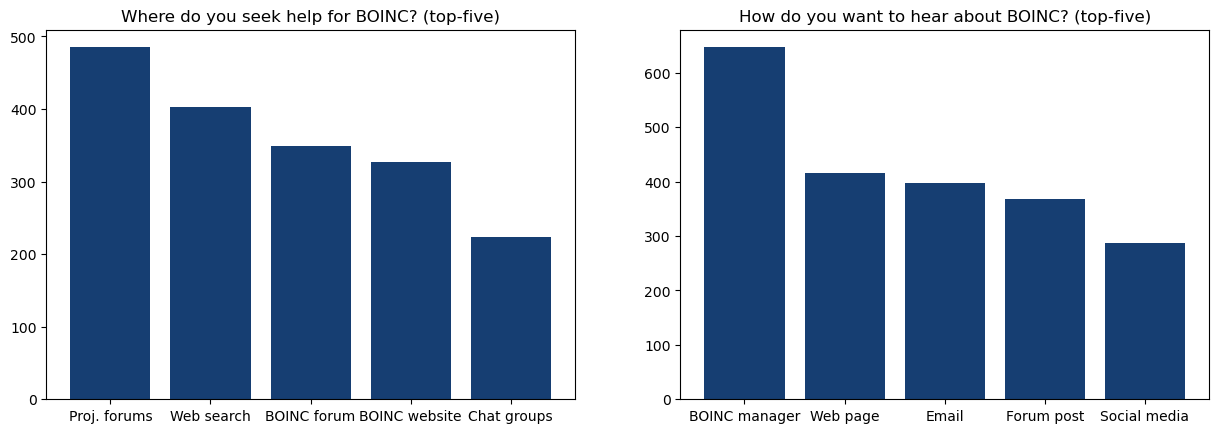

In [10]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
where_help = Counter(multi_sel_to_hist(get_col('Where do you seek help for problems you have with running BOINC?', data)))
where_hear = Counter(multi_sel_to_hist(get_col('In what ways would you like to hear about what BOINC projects are doing?', data)))
# Take the top 5 options to prevent clutter
where_help_top = sorted(where_help.items(), key=lambda x: x[1], reverse=True)[:5]
where_hear_top = sorted(where_hear.items(), key=lambda x: x[1], reverse=True)[:5]

repl_dict = {
    'BOINC project forums/message boards' : 'Proj. forums',
    'Google search or other search engine' : 'Web search',
    'The official BOINC forum/message board' : 'BOINC forum',
    'The BOINC website' : 'BOINC website',
    'Chat groups like Discord or Telegram' : 'Chat groups',
    'Via the BOINC manager' : 'BOINC manager',
    'Via a web page or dashboard' : 'Web page',
    'Email notifications' : 'Email',
    'Forum/message board posts' : 'Forum post'
}

ax[0].bar([repl_dict.get(a[0], a[0]) for a in where_help_top], [a[1] for a in where_help_top], color=BOINC_BLUE)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in where_hear_top], [a[1] for a in where_hear_top], color=BOINC_BLUE)
ax[0].title.set_text('Where do you seek help for BOINC? (top-five)')
ax[1].title.set_text('How do you want to hear about BOINC? (top-five)')

plt.show()

Let's now take a look at what people are demanding.

*Keep in mind that the following two graphs include data that came from multi-select boxes (people can select more than one option)*

Firstly we see what people most want to see in a BOINC project. By far the most popular response was that the work being done is meaningful and benefits the world. From there it is no longer obvious what the most important parts should be. However, frequency of results and publications seems to be fairly common.

In terms of what types of projects people are interested in - anatomy, space and biology are the top 3.

We also allowed people to submit other options for fields of science they are interested in. There were only a few results and no particularly significant options written, although there were a few people who put forward AI/Machine learning projects and also rendering farms like [BURP](http://burp.renderfarming.net/).

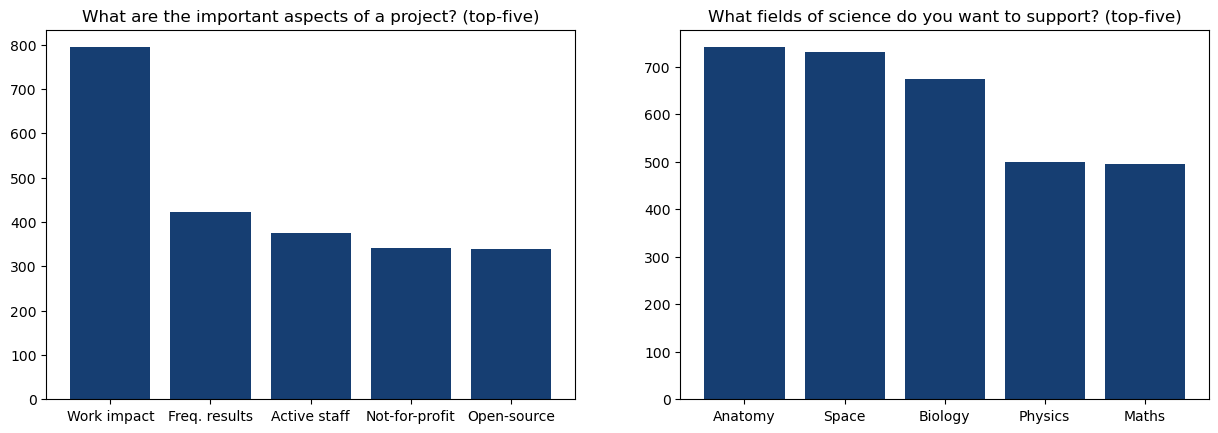

In [12]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
aspects = Counter(multi_sel_to_hist(get_col('What are the most important aspects of a BOINC project?', data)))
science = Counter(multi_sel_to_hist(get_col('What fields of science would you like to support with BOINC?', data)))
# Take the top 5 options to prevent clutter
aspects_top = sorted(aspects.items(), key=lambda x: x[1], reverse=True)[:5]
science_top = sorted(science.items(), key=lambda x: x[1], reverse=True)[:5]

repl_dict = {
    'The work they do is important and beneficial to the world' : 'Work impact',
    'Regularly publishes results/academic papers' : 'Freq. results',
    'Active project staff' : 'Active staff',
    'Space astronomy and astrophysics' : 'Space',
    'Open-source (both code and results)' : 'Open-source',
    'Health science medicine anatomy and the human body' : 'Anatomy',
    'Biology microbiology agriculture and living organisms' : 'Biology',
    'Theoretical particle nuclear and quantum physics' : 'Physics',
    'Mathematics and computer science' : 'Maths'
}

ax[0].bar([repl_dict.get(a[0], a[0]) for a in aspects_top], [a[1] for a in aspects_top], color=BOINC_BLUE)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in science_top], [a[1] for a in science_top], color=BOINC_BLUE)
ax[0].title.set_text('What are the important aspects of a project? (top-five)')
ax[1].title.set_text('What fields of science do you want to support? (top-five)')

plt.show()

Finally we asked people if they ever wanted to start a BOINC project and what's holding them back from doing so.

The results are quite sparse because we had only about 8% of respondents say that they have or want to start a BOINC project. From the results below, technical skills, time commitment and hosting seem to be the biggest issues. From the 'other' responses, documentation seems to be exemplified as there are a few responses that say they are unsatisfied with the current documentation and guides.

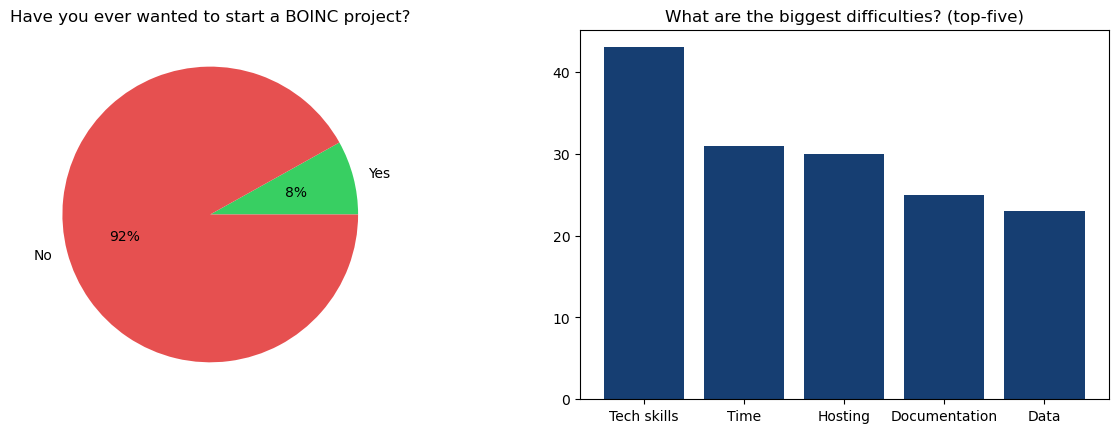

In [13]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
boinc_proj = list(Counter(get_col('Have you ever created a BOINC project or wanted to create one?', data)).items())
boinc_proj.sort(reverse=True)
boinc_diff = Counter(multi_sel_to_hist(get_col('What are the biggest difficulties in making a BOINC project?', data)))
# This was a hidden question so we got a lot of empty results
boinc_diff.pop('')
# Take the top 5 sources to prevent clutter
boinc_diff = sorted(boinc_diff.items(), key=lambda x: x[1], reverse=True)[:5]
repl_dict = {
    'Technical skills' : 'Tech skills',
    'Time commitments' : 'Time',
    'Server hosting/Computer hardware' : 'Hosting',
    'Inadequate documentation' : 'Documentation',
    'Finding applicable data-set' : 'Data'
}

ax[0].pie([a[1] for a in boinc_proj], labels=[a[0] for a in boinc_proj], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in boinc_diff], [a[1] for a in boinc_diff], color=BOINC_BLUE)
ax[0].title.set_text('Have you ever wanted to start a BOINC project?')
ax[1].title.set_text('What are the biggest difficulties? (top-five)')

plt.show()

# Miscellaneous

Here are some interesting questions we posed to the community in the last part of the BOINC Census.

In this section we asked people about reward mechanisms. For those of you that don't know, there are a few organizations out there that reward people for BOINC crunching and it plays a big part in how much people crunch. Personally, being rewarded for BOINC work makes me want to crunch more and I was eager to see that almost half of the respondents said the same thing! Add that to the third that were on-the-fence about it and we have about 80% of respondents who are at least open to the idea of being rewarded for BOINC work.

About two thirds of these respondents said that they know of some organizations or blockchains that reward BOINC crunching. This would be vital feedback to such organizations and blockchain projects on how much of the BOINC community they have reached.

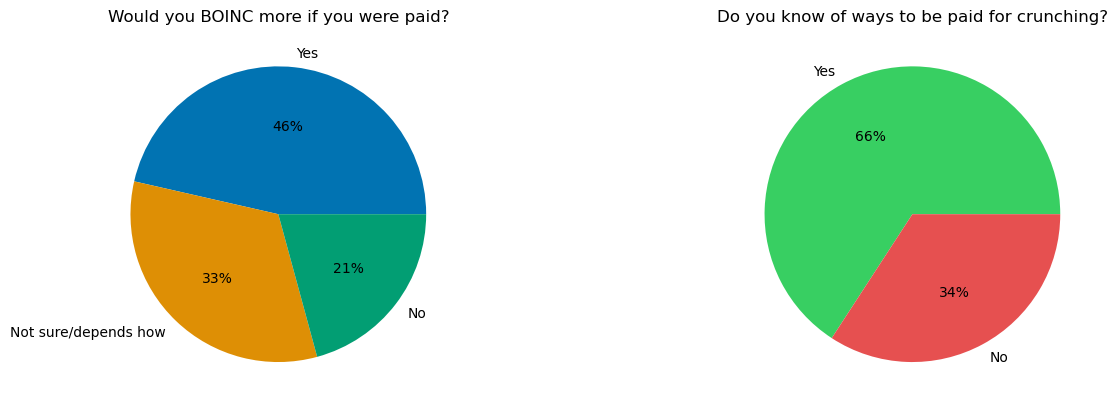

In [14]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

compensation = Counter(get_col('Would you use BOINC more if you were compensated for your crunching?', data)).items()
reward_projects = list(Counter(get_col('Are you aware of any organizations, projects or blockchains that reward people for crunching BOINC?', data)).items())
reward_projects.sort(reverse=True)

ax[0].pie([a[1] for a in compensation], labels=[a[0] for a in compensation], autopct='%.0f%%', colors=GENERAL_COLOURS)
ax[1].pie([a[1] for a in reward_projects], labels=[a[0] for a in reward_projects], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[0].title.set_text('Would you BOINC more if you were paid?')
ax[1].title.set_text('Do you know of ways to be paid for crunching?')

plt.show()

The final question we haven't yet covered is whether people use any other distributed computing platform. This is not only a good way to discover new projects and see what people are using, but also a good way to see where collaborations can be made. 

*Keep in mind that this was yet another question that used a multi-select.*

We find that Folding@home dominates the use of the other platforms, Dreamlabs in second and then the 'other' responses consisted mostly of the following:
- [distributed.net](https://distributed.net/)
- [GIMPS/Prime95](https://www.mersenne.org/)
- [SheepIt](https://www.sheepit-renderfarm.com/home)
- [Learning@home](https://github.com/learning-at-home)


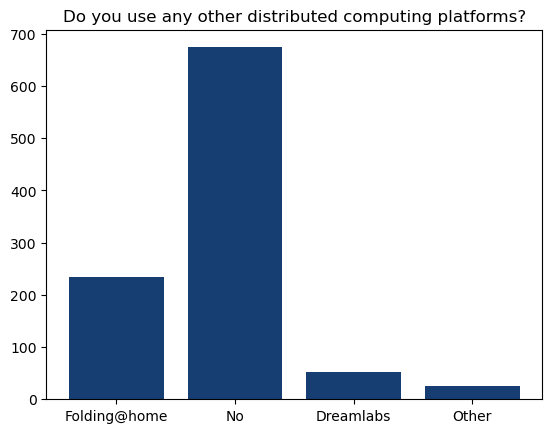

In [15]:
fig, ax = plt.subplots(1, 1)

other_dcn = Counter(multi_sel_to_hist(get_col('Do you use any other distributed computing platforms?', data))).items()

ax.bar([a[0] for a in other_dcn], [a[1] for a in other_dcn], color=BOINC_BLUE)
ax.title.set_text('Do you use any other distributed computing platforms?')

plt.show()

# Conclusion

## Summary

- **Sample size of 939** completed responses (this represents 84% of all responses)
- **Almost all of the respondents identify as male** and about 2-thirds have completed a tertiary education
- Most people want to hear results and news from projects **via the BOINC manager**
- People want to crunch for projects that make a genuine impact on the world
- Nearly half of all respondents said they **will run BOINC more if they were paid for it**

## Improvements for next Census

Based on producing this and also the feedback from the census, here are the things I will be considering for the 2023 BOINC Census:
- Add nuclear as an option for energy source
- Change the financial/non-financial contribution question to a multiple choice
- Add distributed.net and GIMPS to the list of other platforms (these were the most popular)
- Change the year of learning about BOINC to use bins of years rather than exact years. Also add an option for pre-2002
- Add an option for important things about a project: Has CPU work units only/Has GPU workunits. Maybe a question about whether people use CPU or GPU or both.
- Add some questions about teams and gamification
- Remove specify other on education
- Add a 'feedback for BOINC' question at the very end. I saw a lot of responses which included feedback directed at BOINC, not the Census.
- Ask how many BOINC projects people are signed up to
- See about broadcasting the BOINC census on the account manager
- Remove 'Primary education' as an option ('other' will handle the small portion)
- Add some sort of indicator that tells people that they can pick more than one option where appropriate
- See about localization options. There were a few people saying that it was hard to translate into their language.
- Fix the numerical overlap on the 'how many computers' question
- Fix the impact question being optional
- Add some hints to the options for education to help people understand the different options from other countries
- Clarify 'compensation' or change the question to financial/non-financial compensation
- Ask what lengths of WUs people generally like
- See if fillout supports a progress bar

## Get ready for the next Census in November 2023!

# Links

- [The Science Commons Initiative](https://thesciencecommons.org/)
- [Get an email notificaiton for the next BOINC Census](https://48f500b4.sibforms.com/serve/MUIEAPxeBUaEy0MPwbUehC3dmzlUjzNgro4mfwPajqmaUzZ_N5n3uqzifniQf16GDISreI7P79ffdMUT9EKA5B1omZXEauKwXIIWm6LYg0k3371eTVBFMHOCuzDvtYS7yYhrxd2TlAMXlzlSgaKNbLVlEq7NdLbHgemuaxj1xui6BteNFbfMOrBqHfv7r6PTXLxf_vnSSlLNExQw)
- [BOINC Home](https://boinc.berkeley.edu/)
- [The BOINC Discord Server](https://discord.gg/WsKUsBZ)